In [1]:
# Objective: 
# Use ALPACA API to restrieve real time data for 10 stocks, then use various optimization strategies to determine stock portfolio

# Import all neccessary libraries
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import seaborn as sns
import alpaca_trade_api as tradeapi
import requests
import os
%matplotlib inline

In [2]:
# Set up variable for alpaca api key and alpaca secret key
load_dotenv("env.txt")
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [3]:
# Set up request
alpaca_request = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [7]:
# Set up timezone and timeframe variables
start = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-07-07", tz="America/New_York").isoformat()
timeframe = "1D"

In [8]:
# Set up ticker list
tickers = ["T","LUV","NKE","SBUX","MU","WDC","MSFT","AAPL","ENB","JPM"]

In [9]:
# Make request to Alpaca for the list of tickers
df_portfolio = alpaca_request.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Check dataframe
df_portfolio.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-01-02 05:00:00+00:00,154.89,158.8500,154.23,157.92,37041802,249132,155.548599,AAPL
2019-01-03 05:00:00+00:00,143.98,145.7200,142.00,142.19,91375320,663523,143.581304,AAPL
2019-01-04 05:00:00+00:00,144.53,148.5499,143.80,148.26,58616586,376084,146.820178,AAPL
2019-01-07 05:00:00+00:00,148.70,148.8300,145.90,147.93,54788340,348125,147.368725,AAPL
2019-01-08 05:00:00+00:00,149.56,151.8200,148.52,150.75,41039356,272203,150.152130,AAPL


In [10]:
# Seperate each stock into their own dataframe and drop all columns except for "close"
t_df = df_portfolio.loc[df_portfolio["symbol"]=="T"].drop(columns=["open","high","low","volume","trade_count","vwap","symbol"])
luv_df = df_portfolio.loc[df_portfolio["symbol"]=="LUV"].drop(columns=["open","high","low","volume","trade_count","vwap","symbol"])
nke_df = df_portfolio.loc[df_portfolio["symbol"]=="NKE"].drop(columns=["open","high","low","volume","trade_count","vwap","symbol"])
sbux_df = df_portfolio.loc[df_portfolio["symbol"]=="SBUX"].drop(columns=["open","high","low","volume","trade_count","vwap","symbol"])
mu_df = df_portfolio.loc[df_portfolio["symbol"]=="MU"].drop(columns=["open","high","low","volume","trade_count","vwap","symbol"])
wdc_df = df_portfolio.loc[df_portfolio["symbol"]=="WDC"].drop(columns=["open","high","low","volume","trade_count","vwap","symbol"])
msft_df = df_portfolio.loc[df_portfolio["symbol"]=="MSFT"].drop(columns=["open","high","low","volume","trade_count","vwap","symbol"])
aapl_df = df_portfolio.loc[df_portfolio["symbol"]=="AAPL"].drop(columns=["open","high","low","volume","trade_count","vwap","symbol"])
enb_df = df_portfolio.loc[df_portfolio["symbol"]=="ENB"].drop(columns=["open","high","low","volume","trade_count","vwap","symbol"])
jpm_df = df_portfolio.loc[df_portfolio["symbol"]=="JPM"].drop(columns=["open","high","low","volume","trade_count","vwap","symbol"])

In [14]:
# Set up column names for each dataframe
t_df.columns = ["T"]
luv_df.columns = ["LUV"]
nke_df.columns = ["NKE"]
sbux_df.columns = ["SBUX"]
mu_df.columns = ["MU"]
wdc_df.columns = ["WDC"]
msft_df.columns = ["MSFT"]
aapl_df.columns = ["AAPL"]
enb_df.columns = ["ENB"]
jpm_df.columns = ["JPM"]

In [15]:
# Concatenate all dataframe into one combined dataframe
combined_df = pd.concat([t_df,luv_df,nke_df,sbux_df,mu_df,wdc_df,msft_df,aapl_df, enb_df,jpm_df], axis="columns", join="inner")
# Check dataframe
combined_df.head()

,T,LUV,NKE,SBUX,MU,WDC,MSFT,AAPL,ENB,JPM
timestamp,,,,,,,,,,
2019-01-02 05:00:00+00:00,29.54,47.14,74.06,64.32,32.75,38.26,101.12,157.92,31.58,99.31
2019-01-03 05:00:00+00:00,29.58,45.61,72.75,61.53,31.00,35.65,97.40,142.19,31.75,97.11
2019-01-04 05:00:00+00:00,30.34,47.86,74.65,63.57,32.70,37.16,101.93,148.26,32.62,100.69
2019-01-07 05:00:00+00:00,30.89,47.87,75.72,63.57,34.00,38.48,102.06,147.93,33.51,100.76
2019-01-08 05:00:00+00:00,31.28,47.54,76.73,63.62,33.74,38.11,102.80,150.75,34.20,100.57


In [16]:
# Find daily return for each stock and dropna
daily_return = combined_df.pct_change().dropna()

In [17]:
# Check for null data
daily_return.isnull().mean()*100

T       0.0
LUV     0.0
NKE     0.0
SBUX    0.0
MU      0.0
WDC     0.0
MSFT    0.0
AAPL    0.0
ENB     0.0
JPM     0.0
dtype: float64

In [18]:
# Find the annualized volatility for the return of each stock
volatility = daily_return.std()*np.sqrt(252)
volatility.sort_values()

T       0.273840
ENB     0.290371
MSFT    0.312706
SBUX    0.316001
JPM     0.332735
NKE     0.335411
LUV     0.405314
MU      0.469328
AAPL    0.482617
WDC     0.516144
dtype: float64

In [19]:
# Base on the volatility alone, we will drop the top 5 most volatile stocks for this particular portfolio
# Drop NKE, LUV, MU, AAPL and WDC
conservative_portfolio = daily_return.drop(columns = ["NKE","LUV","MU","AAPL","WDC"])
# Check dataframe
conservative_portfolio.head()

,T,SBUX,MSFT,ENB,JPM
timestamp,,,,,
2019-01-03 05:00:00+00:00,0.001354,-0.043377,-0.036788,0.005383,-0.022153
2019-01-04 05:00:00+00:00,0.025693,0.033155,0.046509,0.027402,0.036865
2019-01-07 05:00:00+00:00,0.018128,0.000000,0.001275,0.027284,0.000695
2019-01-08 05:00:00+00:00,0.012625,0.000787,0.007251,0.020591,-0.001886
2019-01-09 05:00:00+00:00,-0.037724,0.004087,0.014300,0.008187,-0.001690


<AxesSubplot:title={'center':'Cummulative Profit for Conservative Strategy'}, xlabel='timestamp'>

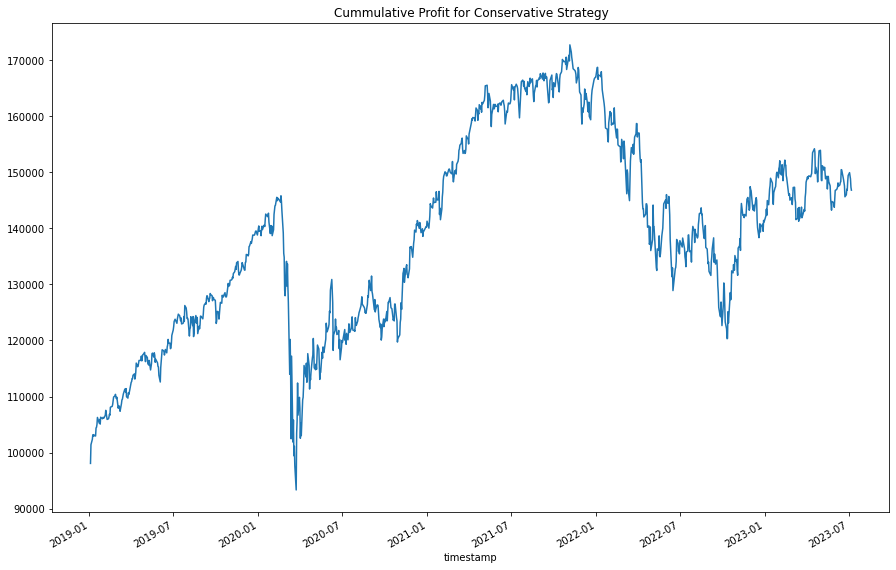

In [22]:
# Plot Cummulative Return for Conservative Strategy
# Set up initial investment amount
initial_investment = 100000

# Set up weights for each stock in the portfolio
weights = [0.2,0.2,0.2,0.2,0.2]

# Compute daily return for conservative portfolio with regards to weights
conservative_return = conservative_portfolio.dot(weights)

# Compute cummulative return for conservative portfolio
conservative_cummulative_return = (1 + conservative_return).cumprod()

# Compute and plot cummulative profit for conservative portfolio
conservative_cummulative_profit = conservative_cummulative_return*initial_investment

conservative_cummulative_profit.plot(figsize=(15,10), title="Cummulative Profit for Conservative Strategy")

<AxesSubplot:>

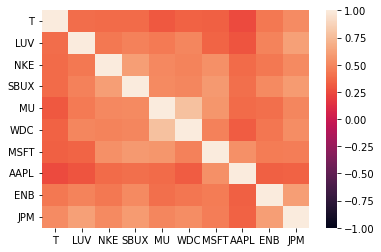

In [23]:
# Find Correlation between the return of each stock. This is done to ensure portfolio's return is as diversified as possible.
correlation = daily_return.corr()

# Use heatmap
sns.heatmap(correlation, vmax=1, vmin=-1)

In [24]:
# Sum correlation
correlation.sum().sort_values()

AAPL    4.209709
T       4.317955
LUV     4.949095
ENB     5.067496
NKE     5.266800
MSFT    5.292938
WDC     5.331592
MU      5.387756
SBUX    5.546016
JPM     5.664370
dtype: float64

In [26]:
# Base on correlation, we will drop 2 stocks with the highest number of correlatedness
# Drop JPM, SBUX
diversified_portfolio = daily_return.drop(columns=["JPM","SBUX"])
# Check diversified_portfolio
diversified_portfolio.head()

,T,LUV,NKE,MU,WDC,MSFT,AAPL,ENB
timestamp,,,,,,,,
2019-01-03 05:00:00+00:00,0.001354,-0.032457,-0.017688,-0.053435,-0.068217,-0.036788,-0.099607,0.005383
2019-01-04 05:00:00+00:00,0.025693,0.049331,0.026117,0.054839,0.042356,0.046509,0.042689,0.027402
2019-01-07 05:00:00+00:00,0.018128,0.000209,0.014334,0.039755,0.035522,0.001275,-0.002226,0.027284
2019-01-08 05:00:00+00:00,0.012625,-0.006894,0.013339,-0.007647,-0.009615,0.007251,0.019063,0.020591
2019-01-09 05:00:00+00:00,-0.037724,0.032394,-0.001825,0.050385,0.044083,0.014300,0.016982,0.008187


<AxesSubplot:title={'center':'Cummulative Profit for Diversified Strategy'}, xlabel='timestamp'>

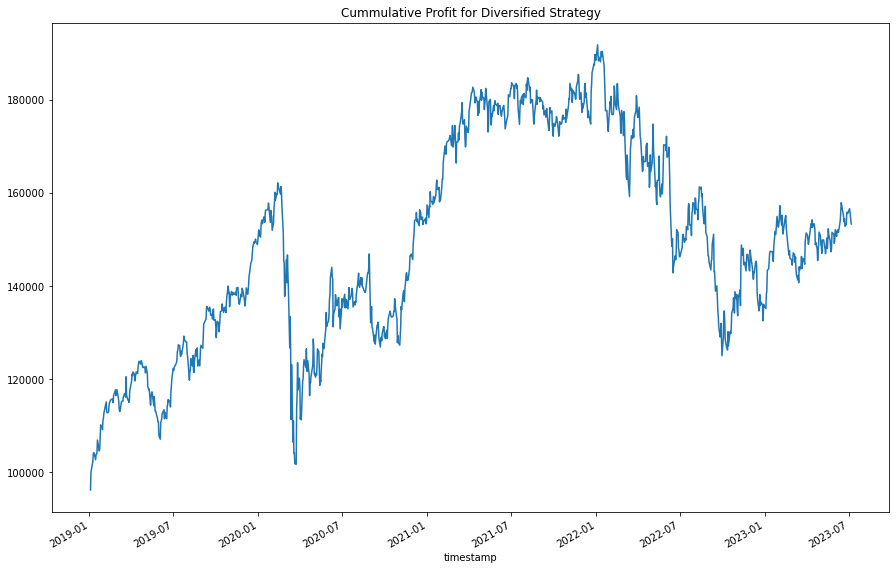

In [27]:
# Plot Cummulative Return for Diversified Strategy
# Set up initial investment amount
initial_investment = 100000

# Set up weights for each stock in the portfolio
weights = [0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]

# Compute daily return for diversified portfolio with regards to weights
diversified_return = diversified_portfolio.dot(weights)

# Compute cummulative return for diversified portfolio
diversified_cummulative_return = (1 + diversified_return).cumprod()

# Compute and plot cummulative profit for diversified portfolio
diversified_cummulative_profit = diversified_cummulative_return*initial_investment

diversified_cummulative_profit.plot(figsize=(15,10), title="Cummulative Profit for Diversified Strategy")

In [29]:
# Compute for risk return (Sharp_ratio)
sharpe_ratio = (daily_return.mean()*252)/(daily_return.std()*np.sqrt(252))
sharpe_ratio.sort_values()

T      -0.377537
LUV     0.078709
WDC     0.253337
ENB     0.256200
NKE     0.394434
JPM     0.415255
SBUX    0.439836
AAPL    0.482757
MU      0.526509
MSFT    1.011904
dtype: float64

In [31]:
# Base on sharpe ratio alone, we will drop the 5 stocks that yields the lowest return ratio
# Drop T, LUV, WDC, ENB, NKE
risk_reward_portfolio = daily_return.drop(columns=["T","LUV","WDC","ENB","NKE"])
# Check risk_reward portfolio
risk_reward_portfolio.head()

,SBUX,MU,MSFT,AAPL,JPM
timestamp,,,,,
2019-01-03 05:00:00+00:00,-0.043377,-0.053435,-0.036788,-0.099607,-0.022153
2019-01-04 05:00:00+00:00,0.033155,0.054839,0.046509,0.042689,0.036865
2019-01-07 05:00:00+00:00,0.000000,0.039755,0.001275,-0.002226,0.000695
2019-01-08 05:00:00+00:00,0.000787,-0.007647,0.007251,0.019063,-0.001886
2019-01-09 05:00:00+00:00,0.004087,0.050385,0.014300,0.016982,-0.001690


<AxesSubplot:title={'center':'Cummulative Profit for Risk-Reward Strategy'}, xlabel='timestamp'>

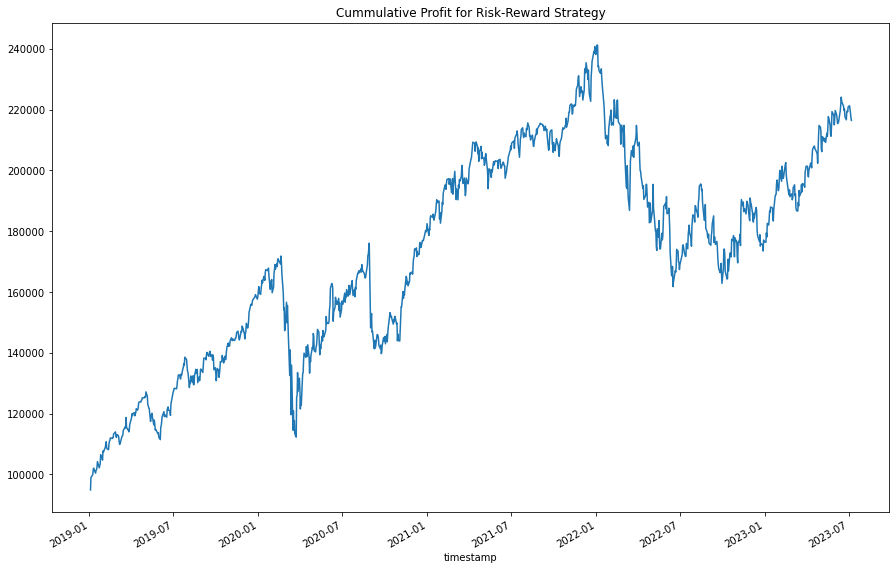

In [32]:
# Plot Cummulative Return for Risk-Reward Strategy
# Set up initial investment amount
initial_investment = 100000

# Set up weights for each stock in the portfolio
weights = [0.20,0.20,0.20,0.20,0.20]

# Compute daily return for risk_reward portfolio with regards to weights
risk_reward_return = risk_reward_portfolio.dot(weights)

# Compute cummulative return for risk_reward portfolio
risk_reward_cummulative_return = (1 + risk_reward_return).cumprod()

# Compute and plot cummulative profit for risk_reward portfolio
risk_reward_cummulative_profit = risk_reward_cummulative_return*initial_investment

risk_reward_cummulative_profit.plot(figsize=(15,10), title="Cummulative Profit for Risk-Reward Strategy")

In [33]:
# Develop optimize approch based on correlation and risk-return ratio
# Base on correlation, we will drop 2 stocks with the highest number of correlatedness
# Drop JPM, SBUX
optimized_portfolio = daily_return.drop(columns=["JPM","SBUX"])
# Check diversified_portfolio
optimized_portfolio.head()

,T,LUV,NKE,MU,WDC,MSFT,AAPL,ENB
timestamp,,,,,,,,
2019-01-03 05:00:00+00:00,0.001354,-0.032457,-0.017688,-0.053435,-0.068217,-0.036788,-0.099607,0.005383
2019-01-04 05:00:00+00:00,0.025693,0.049331,0.026117,0.054839,0.042356,0.046509,0.042689,0.027402
2019-01-07 05:00:00+00:00,0.018128,0.000209,0.014334,0.039755,0.035522,0.001275,-0.002226,0.027284
2019-01-08 05:00:00+00:00,0.012625,-0.006894,0.013339,-0.007647,-0.009615,0.007251,0.019063,0.020591
2019-01-09 05:00:00+00:00,-0.037724,0.032394,-0.001825,0.050385,0.044083,0.014300,0.016982,0.008187


In [34]:
# Sharpe ratio in optimized portfolio
# Compute for risk return (Sharp_ratio)
sharpe_ratio = (optimized_portfolio.mean()*252)/(optimized_portfolio.std()*np.sqrt(252))
sharpe_ratio.sort_values()

T      -0.377537
LUV     0.078709
WDC     0.253337
ENB     0.256200
NKE     0.394434
AAPL    0.482757
MU      0.526509
MSFT    1.011904
dtype: float64

In [35]:
# Base on sharpe ratio, we will the 3 lowest return stocks
# Drop T, LUV and WDC
optimized_portfolio = optimized_portfolio.drop(columns=["T","LUV","WDC"])
# Check dataframe
optimized_portfolio.head()

,NKE,MU,MSFT,AAPL,ENB
timestamp,,,,,
2019-01-03 05:00:00+00:00,-0.017688,-0.053435,-0.036788,-0.099607,0.005383
2019-01-04 05:00:00+00:00,0.026117,0.054839,0.046509,0.042689,0.027402
2019-01-07 05:00:00+00:00,0.014334,0.039755,0.001275,-0.002226,0.027284
2019-01-08 05:00:00+00:00,0.013339,-0.007647,0.007251,0.019063,0.020591
2019-01-09 05:00:00+00:00,-0.001825,0.050385,0.014300,0.016982,0.008187


<AxesSubplot:title={'center':'Cummulative Profit for Optimized Strategy'}, xlabel='timestamp'>

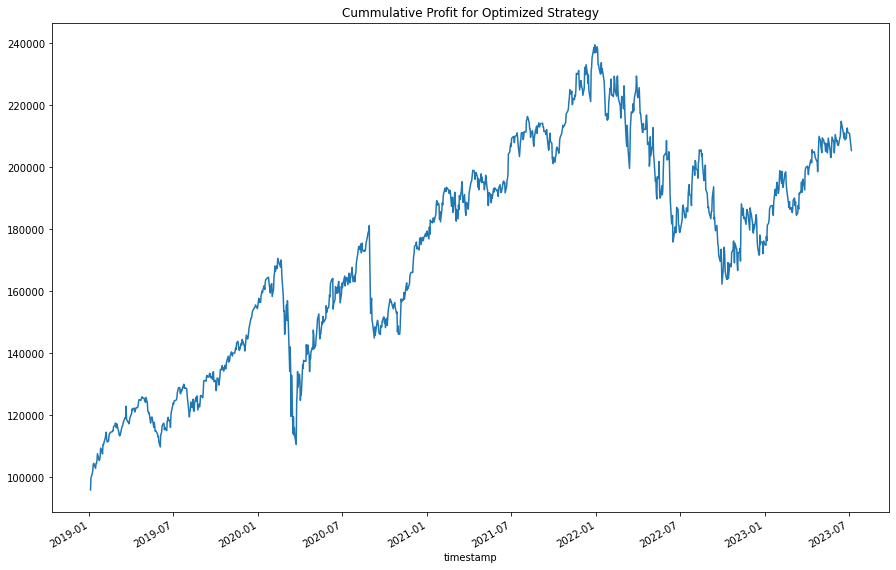

In [36]:
# Plot Cummulative Return for Optimized Strategy
# Set up initial investment amount
initial_investment = 100000

# Set up weights for each stock in the portfolio
weights = [0.20,0.20,0.20,0.20,0.20]

# Compute daily return for optimized portfolio with regards to weights
optimized_return = optimized_portfolio.dot(weights)

# Compute cummulative return for optimized portfolio
optimized_cummulative_return = (1 + optimized_return).cumprod()

# Compute and plot cummulative profit for optimized portfolio
optimized_cummulative_profit = optimized_cummulative_return*initial_investment

optimized_cummulative_profit.plot(figsize=(15,10), title="Cummulative Profit for Optimized Strategy")

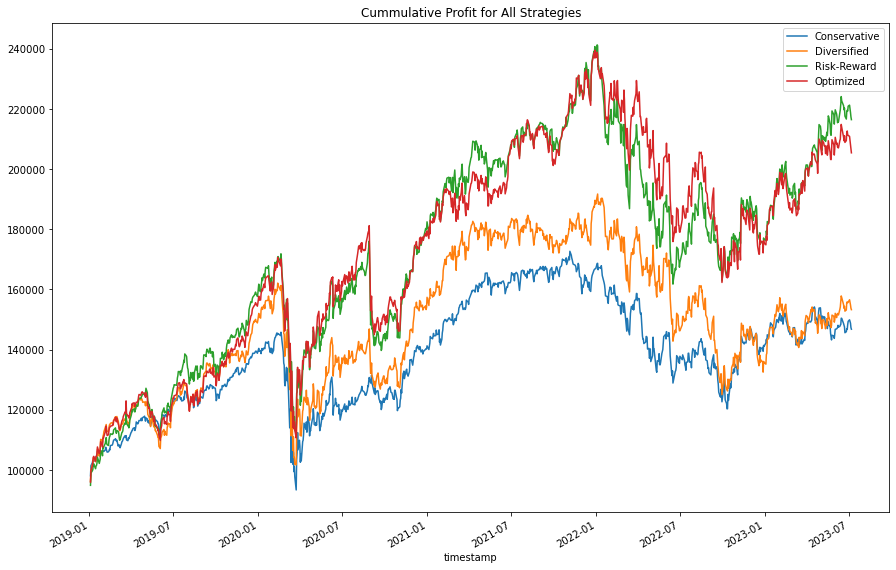

In [37]:
# Overlay and compare each strategy to determine which one gives the best result YTD
ax = conservative_cummulative_profit.plot(figsize=(15,10), title="Cummulative Profit for All Strategies")

diversified_cummulative_profit.plot(ax=ax)
risk_reward_cummulative_profit.plot(ax=ax)
optimized_cummulative_profit.plot(ax=ax)

ax.legend(["Conservative","Diversified","Risk-Reward","Optimized"])

In [40]:
# Base on the result we can oberserve in the overlay, risk-reward strategy has the best performance while optimized strategy is very closed with less risk involved.

conservative_ytd_profit = round(conservative_cummulative_profit[-1],2)
diversified_ytd_profit = round(diversified_cummulative_profit[-1],2)
risk_reward_ytd_profit = round(risk_reward_cummulative_profit[-1],2)
optimized_ytd_profit = round(optimized_cummulative_profit[-1],2)

In [42]:
print(f"The YTD profit for conservative portfolio is ${conservative_ytd_profit}.")
print(f"The YTD profit for diversified portfolio is ${diversified_ytd_profit}.")
print(f"The YTD profit for risk-reward portfolio is ${risk_reward_ytd_profit}.")
print(f"The YTD profit for optimized portfolio is ${optimized_ytd_profit}.")

The YTD profit for conservative portfolio is $146794.99.
The YTD profit for diversified portfolio is $153290.85.
The YTD profit for risk-reward portfolio is $216458.59.
The YTD profit for optimized portfolio is $205426.17.
